In [8]:
import requests
url = "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"

try:
    httpReq = requests.get(url, proxies=None)
except NameError:
    httpReq = requests.get(url)
ans = httpReq.text

In [9]:
ans

'uniprotkb:P0CW72\tuniprotkb:P0CW72\tintact:EBI-2620133|uniprotkb:Q777A5\tintact:EBI-2620133|uniprotkb:Q777A5\tpsi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)\tpsi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)\tpsi-mi:"MI:0397"(two hybrid array)\tCalderwood et al. (2007)\timex:IM-20435|mint:MINT-6769080|pubmed:17446270\ttaxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")\ttaxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")\tpsi-mi:"MI:0915"(physical association)\tpsi-mi:"MI:0469"(IntAct)\tintact:EBI-2620961|imex:IM-20435-3\tauthor score:+|intact-miscore:0.51\nuniprotkb:P0C704\tuniprotkb:P14348\tintact:EBI-2620975|uniprotkb:Q3KSQ5\tintact:EBI-2620158|uniprotkb:Q777G5|intact:EBI-9645437\tpsi-mi:mcp_ebvg(display_long)|uni

In [13]:
import re

def mitabReader(httpText):
    for line in httpText.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]
                
            
def isMitab_EBV_EBV(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reEBV, mitabArray[10]):
        return True
    return False

def isMitab_Human_EBV(mitabLine):
    reHUMAN = "taxid:9606"
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reHUMAN, mitabArray[10]):
        return True
    elif re.search(reEBV, mitabArray[10]) and re.search(reHUMAN, mitabArray[9]):
        return True
    return False


EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0
for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else : 
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)} EBV-Human {len(EBV_Human_mitab)}")

Nombre total d'interactions 230, EBV-EBV 59 EBV-Human 171


In [14]:
def mitabReader(httpText):
    for line in httpText.split("\n"):
        _ = line.split("\t")
        print(_[6])
        
mitabReader(ans) #Pull down et two hybrid.

psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two hybrid array)
psi-mi:"MI:0397"(two

IndexError: list index out of range

In [16]:
ebv_prot = set()
for data in EBV_EBV_mitab:
    ebv_prot.add(data[0])
    ebv_prot.add(data[1])
print(f"{len(ebv_prot)} EBV protein")
    
human_prot = set()
for data in EBV_Human_mitab:
    human_prot.add(data[0])
    human_prot.add(data[1])
human_prot = human_prot - ebv_prot
print(f"{len(human_prot)} Human protein")

48 EBV protein
129 Human protein


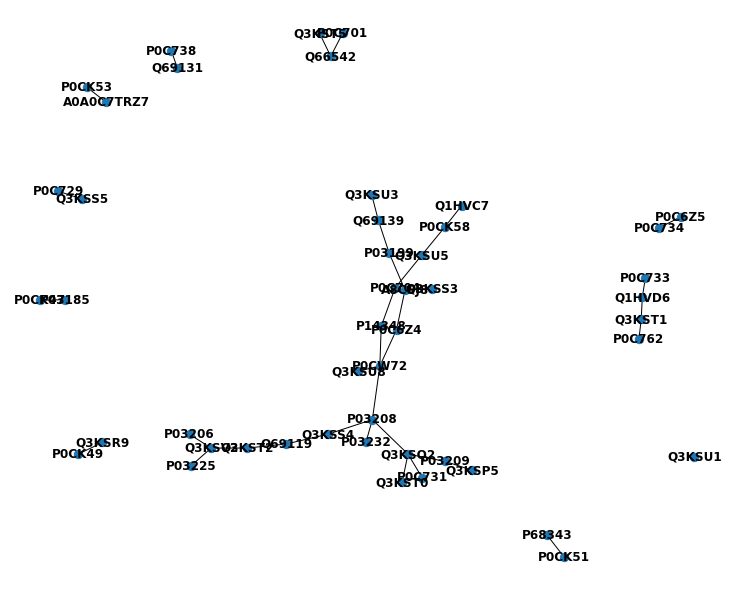

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

plt.figure(figsize=(10,8))

for data in EBV_EBV_mitab:
    p1 = data[0]
    p2 = data[1]
    G.add_edge(p1, p2)

nx.draw(G, with_labels=True, font_weight='bold', node_size=70)
plt.show()

In [27]:
plt.savefig("EBV_EBV_network.jpeg")

<Figure size 432x288 with 0 Axes>